## Notebook/ Submission3
For this notebook and submission, I plan to dummify some columns and incorporate those into my multiple linear regression model

In [1]:
#Import libraries and read in datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import warnings; warnings.simplefilter('ignore')

In [2]:
train2 = pd.read_csv('./datasets/train2.csv')
test1 = pd.read_csv('./datasets/test1.csv')

In [6]:
train2.set_index('Id', inplace=True)
test1.set_index('Id', inplace=True)

Previous Features:  
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 
            'Qual_Cond', 'lot_liv', 'TotRms AbvGrd', 'Garage Yr Blt', 'Overall Cond', 'Kitchen AbvGr', 'Bedroom AbvGr']

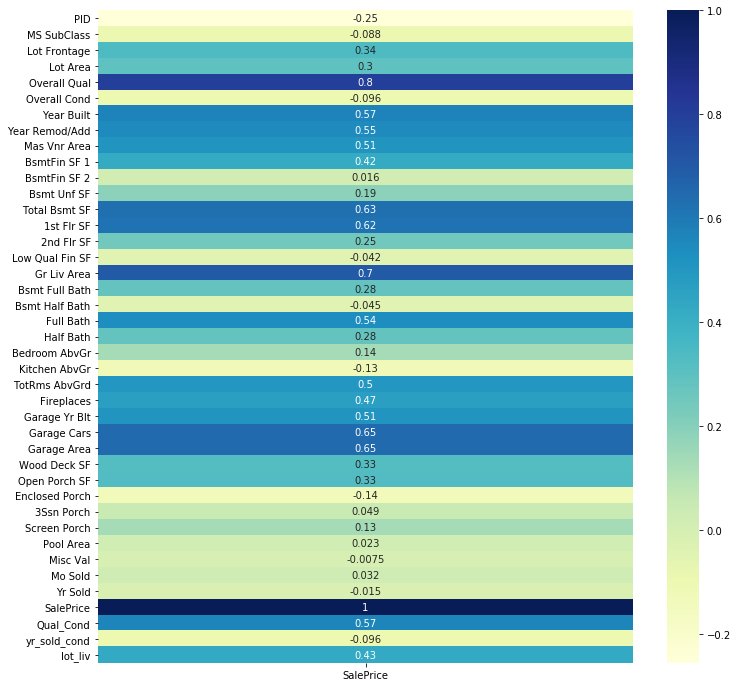

In [7]:
#Check correlations
plt.figure(figsize=(12,12))
sns.heatmap(train2.corr()[['SalePrice']], annot=True, cmap='YlGnBu');

## To Dummify and Use for this submission:
    Fireplaces : Top 2 conditions  
    Street: Gravel 0, paved 1  
    Utilities: all public or not  
   


In [8]:
#Function to get dummies for Fireplace, Street type, and Utilities
#This function creates the dummies but does not directly add them to my dataset - 
#I only picked certain dummy columns to add to the dataframe, so that way I didnt add too many irrelevant columns
def dummies(df):
    df['Fireplace Qu'].fillna('NA')
    fire_dum = pd.get_dummies(df['Fireplace Qu'])
    df['high_qual_fp'] = fire_dum['Ex']+fire_dum['Gd']
    street_dum = pd.get_dummies(df['Street'])
    df['paved_street'] = street_dum['Pave']
    utilities_dum = pd.get_dummies(df['Utilities'])
    df['all_pub'] = utilities_dum['AllPub']
    return df.head()


In [9]:
dummies(train2)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Mo Sold,Yr Sold,Sale Type,SalePrice,Qual_Cond,yr_sold_cond,lot_liv,high_qual_fp,paved_street,all_pub
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,3,2010,WD,130500,48,16080,19991643,0,1,1
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,4,2009,WD,220000,35,10045,24386024,0,1,1
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,1,2010,WD,109000,35,14070,8373554,0,1,1
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,4,2010,WD,174000,25,10050,14154088,0,1,1
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,3,2010,WD,138500,48,16080,20569575,0,1,1


In [10]:
dummies(test1)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Misc Val,Mo Sold,Yr Sold,Sale Type,yr_sold_cond,lot_liv,Qual_Cond,high_qual_fp,paved_street,all_pub
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,4,2006,WD,16048,17625776,48,0,1,1
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,8,2006,WD,8024,19005154,20,0,1,1
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2006,New,10030,25587584,35,1,1,1
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,7,2007,WD,12042,8247360,30,0,1,1
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,7,2009,WD,10045,13243000,30,1,1,1


In [1]:
#set up my linear regression model
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 
            'Qual_Cond', 'lot_liv', 'TotRms AbvGrd', 'Garage Yr Blt', 'Overall Cond', 'Kitchen AbvGr', 'Bedroom AbvGr', 
           'high_qual_fp', 'paved_street', 'all_pub']
X = train2[features]
y = train2['SalePrice']

NameError: name 'train2' is not defined

In [13]:
def r2_adj(x, y, k):
    lr = LinearRegression()
    lr.fit(x, y)
    null_pred=y.mean()
    null_resids = y-null_pred
    null_sse = (null_resids**2).sum()
    pred = lr.predict(x)
    resids = y - pred
    sse=(resids**2).sum()
    r2 = 1-((sse) / (null_sse))
    n = len(y)
    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj

In [14]:
def run_metrics(x,y, k):
    lr = LinearRegression()
    lr.fit(x, y)
    pred = lr.predict(x)
    
    resids = y - pred
    r2 = lr.score(x,y)
    mae = metrics.mean_absolute_error(y, pred)
    sse = (resids**2).sum()
    rmse = metrics.mean_squared_error(y, pred, squared=False)
    mse = metrics.mean_squared_error(y, pred)
    r2a = r2_adj(x,y,k)
    print(f'Mean Adjusted errors: {mae}')
    print(f'Sum Squared Errors: {sse}')
    print(f'Mean Square Errors: {mse}' )
    print(f'Root Mean Square Errors: {rmse}')
    print(f'R2: {r2}')
    print(f'Adjusted R2: {r2a}')

In [15]:
run_metrics(X,y,17)
#The R2 and RMSE are lower than my submission2 model!

Mean Adjusted errors: 22434.376731453733
Sum Squared Errors: 2502434259739.9424
Mean Square Errors: 1221295392.7476537
Root Mean Square Errors: 34947.0369666393
R2: 0.8055081384692537
Adjusted R2: 0.8038801908345797


In [17]:
#set up a train test split to see how my model handled "new" data
X_test, X_train, y_test, y_train = train_test_split(X, y,  test_size =0.2)

In [18]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(f'R2 Train {linreg.score(X_train, y_train)}')
print(f'RMSE Train {metrics.mean_squared_error(y_train, linreg.predict(X_train), squared=False)}')
print(f'R2 Test {linreg.score(X_test, y_test)}')
print(f'RMSE Test {metrics.mean_squared_error(y_test, linreg.predict(X_test), squared=False)}')

R2 Train 0.8120653776259673
RMSE Train 33991.88188296757
R2 Test 0.7296581544819571
RMSE Test 41306.92586585274


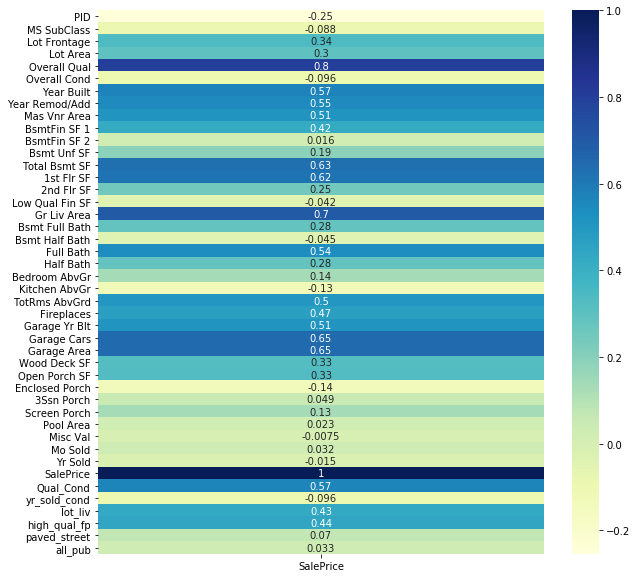

In [26]:
#Too much variance/ model is overfit - the R2 values are almost 10% apart
#Check correlations to choose which features to remove
plt.figure(figsize=(10,10))
sns.heatmap(train2.corr()[['SalePrice']], annot=True, cmap= 'YlGnBu');

In [28]:
#Removed all_pub and Yr_sold_Cond as they have the smallest correlations
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 
            'Qual_Cond', 'lot_liv', 'TotRms AbvGrd', 'Garage Yr Blt', 'Overall Cond', 'Kitchen AbvGr', 'Bedroom AbvGr', 
           'high_qual_fp', 'paved_street']
X = train2[features]
y = train2['SalePrice']
run_metrics(X,y,16)

Mean Adjusted errors: 22434.34721024156
Sum Squared Errors: 2502434336643.7236
Mean Square Errors: 1221295430.2800019
Root Mean Square Errors: 34947.037503628286
R2: 0.8055081324922095
Adjusted R2: 0.8039767004645892


In [30]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
X_test, X_train, y_test, y_train = train_test_split(X, y,  test_size =0.2)
print(f'R2 Train {linreg.score(X_train, y_train)}')
print(f'RMSE Train {metrics.mean_squared_error(y_train, linreg.predict(X_train), squared=False)}')
print(f'R2 Test {linreg.score(X_test, y_test)}')
print(f'RMSE Test {metrics.mean_squared_error(y_test, linreg.predict(X_test), squared=False)}')
#Removing the 2 variables brought the R2 value closer

R2 Train 0.8447949542452753
RMSE Train 28916.578518511044
R2 Test 0.7673948828061367
RMSE Test 38874.30083455619


In [32]:
#Train looks really good so I want to try cross val from Adi's lecture 3.04
cross_val_score(estimator=linreg, X=X_train, y=y_train)

array([0.87177496, 0.84234137, 0.8161759 , 0.89609627, 0.82166334])

In [33]:
cross_val_score(estimator=linreg, X=X_train, y=y_train).mean()

0.849610368623446

In [34]:
#Predict sale price and create output
test1['SalePrice'] = linreg.predict(test1[features])

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Mo Sold,Yr Sold,Sale Type,yr_sold_cond,lot_liv,Qual_Cond,high_qual_fp,paved_street,all_pub,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,4,2006,WD,16048,17625776,48,0,1,1,145889.087802
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,8,2006,WD,8024,19005154,20,0,1,1,181700.430644
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,9,2006,New,10030,25587584,35,1,1,1,201702.445499
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,7,2007,WD,12042,8247360,30,0,1,1,107681.276075
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,7,2009,WD,10045,13243000,30,1,1,1,182617.673149


In [36]:
output3 = test1[['SalePrice']]
output3.head()

,SalePrice
Id,
2658,145889.087802
2718,181700.430644
2414,201702.445499
1989,107681.276075
625,182617.673149


In [37]:
output3.to_csv('./datasets/dana_submission_3.csv')
train2.to_csv('./datasets/train3.csv')
test1.to_csv('./datasets/test2.csv')

## Summary
In this notebook, I made some dummy columns and added the ones I wanted in my model to my data frame.
I created a new output to submit to Kaggle